In [14]:
#import depensencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import legacy
import matplotlib.pyplot as plt
import pathlib

In [15]:
import pathlib
import tensorflow as tf

# Define the URL of the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Get the local directory path to store the dataset
local_dir = pathlib.Path("/Users/rohansridhar/Desktop/CAEI/CAEI_AI_MODELS/RESNET/data")

# Download and extract the dataset
data_directory = tf.keras.utils.get_file(
    'flower_photos', origin=dataset_url, untar=True, cache_dir=local_dir)

# Convert the data directory path to a Path object
data_directory = pathlib.Path(data_directory)


228813984/228813984 [==============================] - 43s 0us/step


In [16]:
# Define the image size and batch size
img_height, img_width = 180, 180
batch_size = 32

In [17]:
# Create the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


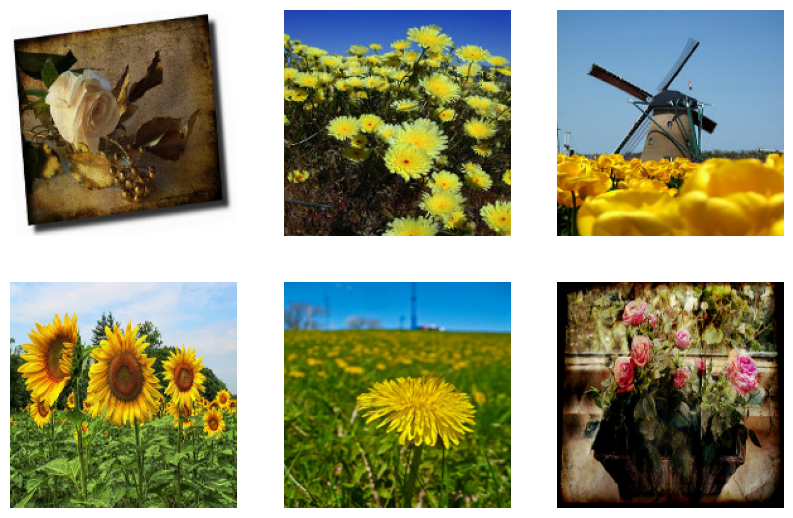

In [18]:
# Plot some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [19]:

# Create the ResNet50 model and set the layers to be non-trainable
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='avg',
                                                  weights='imagenet')
# add your preffered versions of residual network
for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)

In [20]:
# Add fully connected layers for classification
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(5, activation='softmax'))

In [21]:
# Compile and train the model
optimizer = legacy.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
resnet_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [22]:
# Then train your model
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 55s 569ms/step - loss: 1.6840 - accuracy: 0.7228 - val_loss: 0.7353 - val_accuracy: 0.8229
Epoch 2/10
92/92 [==============================] - 48s 519ms/step - loss: 0.5215 - accuracy: 0.8559 - val_loss: 0.5043 - val_accuracy: 0.8474
Epoch 3/10
92/92 [==============================] - 51s 550ms/step - loss: 0.4050 - accuracy: 0.8702 - val_loss: 0.6816 - val_accuracy: 0.8038
Epoch 4/10
92/92 [==============================] - 49s 533ms/step - loss: 0.2724 - accuracy: 0.9070 - val_loss: 0.4915 - val_accuracy: 0.8597
Epoch 5/10
92/92 [==============================] - 54s 584ms/step - loss: 0.2416 - accuracy: 0.9142 - val_loss: 0.5614 - val_accuracy: 0.8501
Epoch 6/10
92/92 [==============================] - 53s 570ms/step - loss: 0.2084 - accuracy: 0.9254 - val_loss: 0.4436 - val_accuracy: 0.8828
Epoch 7/10
92/92 [==============================] - 49s 535ms/step - loss: 0.1476 - accuracy: 0.9475 - val_loss: 0.4974 - val_accuracy: 0.8624

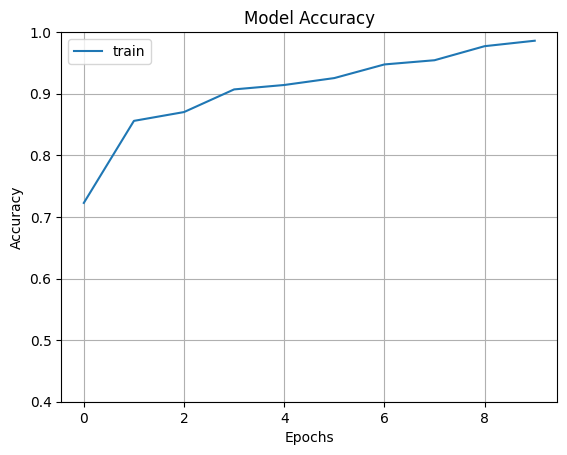

In [23]:
# Evaluate the ResNet-50 model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [40]:
# Define the path to the directory containing the image files
roses_dir = pathlib.Path("/Users/rohansridhar/Desktop/CAEI/CAEI_AI_MODELS/RESNET/data/datasets/flower_photos/roses")  # Replace with the actual path to your roses directory


In [48]:
# Get the list of image files in the directory
image_files = list(roses_dir.glob("*"))  # This will list all files in the directory, you may need to filter if there are other files

# Read the first image file
image = cv2.imread(str(image_files[3]))  # Access the file path using str() before indexing

# Define image dimensions
img_height, img_width = 180, 180


In [49]:
# Preprocess the image
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

# Make predictions
image_pred = resnet_model.predict(image)

1/1 [==============================] - 0s 192ms/step


In [50]:
# Print predicted probabilities
print("Predicted probabilities:", image_pred)

# Get the index of the highest probability
predicted_class_index = np.argmax(image_pred)

# Define class labels (assuming you have them)
class_labels = [ "daisy", "dandelions","roses","sunflowers", "tulips"]

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]


Predicted probabilities: [[1.4928860e-06 5.9567469e-07 9.9727947e-01 4.1098087e-05 2.6773468e-03]]


In [52]:
# Print the predicted class label
print("Predicted class:", predicted_class_label)

Predicted class: roses


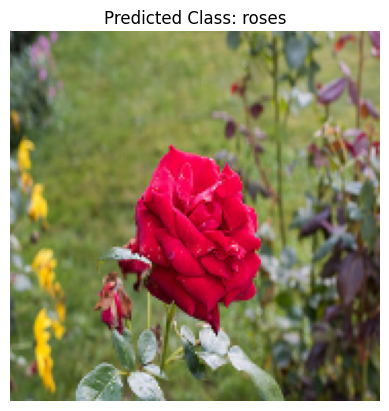

In [53]:
import matplotlib.pyplot as plt

# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Predicted Class: " + predicted_class_label)
plt.axis("off")
plt.show()
